# Proyek Analisis Data : Bike Sharing
- **Nama:** Azzah Nabila Herdy
- **Email:** azzah8872@gmail.com/m246b4kx0778@bangkit.academy
- **ID Dicoding:** azzah2304

## Menentukan Pertanyaan Bisnis

- Paling banyak sepeda disewa pada jam berapa dalam sehari?
- Hari apa yang menunjukkan jumlah penyewaan sepeda tertinggi dalam seminggu?
- Apakah ada perbedaan besar dalam penyewaan sepeda antara weekday dan weekend?

## Import Semua Packages/Library yang Digunakan

In [211]:
pip install numpy pandas scipy matplotlib seaborn jupyter

## Data Wrangling

### Gathering Data

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# Tabel hari
day_df = pd.read_csv("https://raw.githubusercontent.com/Azzah2323/projek/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [214]:
# Tabel jam
hour_df = pd.read_csv("https://raw.githubusercontent.com/Azzah2323/projek/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membuat empat tabel dari sebuah dataset yang diperoleh dari repository
- Ada dua dataset yaitu day dan hour
- Tahap ini yaitu membuat tabel yaitu guna mengumpulkan dan mempersiapkan data sebelum dilakukan analisis lebih lanjut.
- Mendapatkan data lengkap yang akan memudahkan untuk langkah analisis berikutnya

### Assessing Data

In [215]:
# Menilai data day
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [216]:
print(day_df[['season', 'weathersit', 'holiday', 'workingday']].nunique())
print(day_df[['season', 'weathersit', 'holiday', 'workingday']].drop_duplicates())

season        4
weathersit    3
holiday       2
workingday    2
dtype: int64
     season  weathersit  holiday  workingday
0         1           2        0           0
2         1           1        0           1
6         1           2        0           1
8         1           1        0           0
16        1           2        1           0
25        1           3        0           1
79        2           2        0           1
80        2           1        0           1
84        2           1        0           0
85        2           2        0           0
89        2           3        0           1
104       2           1        1           0
105       2           3        0           0
171       3           2        0           1
172       3           1        0           1
175       3           1        0           0
183       3           2        0           0
184       3           2        1           0
248       3           3        0           1
265       4           2

In [217]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [218]:
# Menilai data hour
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [219]:
print(hour_df[['temp', 'hum', 'windspeed']].describe())

               temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098
std        0.192556      0.192930      0.122340
min        0.020000      0.000000      0.000000
25%        0.340000      0.480000      0.104500
50%        0.500000      0.630000      0.194000
75%        0.660000      0.780000      0.253700
max        1.000000      1.000000      0.850700


In [220]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Menilai data yang telah diperoleh dari proses data wrangling
- Terdapat format data yang tidak sesuai, hal ini harus diperbaiki agar sesuai dengan ketentuan
- Penilaian dilakukan untuk mengetahui apakah ada data yang tidak sesuai. Terdapat pengecekan duplikasi, missing value, tipe data dan pengecekan kesalahan input data
- Penggunaan file CSV yang digunakan pada dataset dan URL eksternal yang digunakan untuk mempermudah memperoleh data yang lebih besar dan terstruktur

### Cleaning Data

In [221]:
# Membersihkan data day
# Mengubah tipe data dteday

day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d', errors='coerce')


In [222]:
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [223]:
# Membersihkan data hour
# Mengubah tipe data dteday

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d', errors='coerce')


In [224]:
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Setelah data di assessment tahap selanjutnya yaitu data cleaning dimana pada tahap ini data diperiksa apakan ada kesalahan input data dan sebagainya
- Tidak ada duplikasi yang terjadi pada data diatas
- Terdapat format data yang tidak sesuai, hal ini harus diperbaiki agar sesuai dengan ketentuan

## Exploratory Data Analysis (EDA)

### Explore data day


In [225]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [226]:
# Berdasarkan bulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
print("Penyewaan Sepeda Berdasarkan Bulan:")
print(monthly_rentals)

Penyewaan Sepeda Berdasarkan Bulan:
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [227]:
# Penyewaan per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
print("Penyewaan Sepeda Berdasarkan Jam:")
print(hourly_rentals)

Penyewaan Sepeda Berdasarkan Jam:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


In [228]:
# per hari dalam seminggu
weekday_rentals = day_df.groupby('weekday')['cnt'].sum()
print("Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:")
print(weekday_rentals)

Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:
weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64


In [229]:
day_df['hr'] = day_df['instant'] % 24
hourly_rentals = day_df.groupby('hr')['cnt'].sum().reset_index()
print("Jumlah sepeda yang disewa per jam:")
print(hourly_rentals)

Jumlah sepeda yang disewa per jam:
    hr     cnt
0    0  142080
1    1  143302
2    2  131313
3    3  132099
4    4  134575
5    5  140941
6    6  142148
7    7  143691
8    8  143199
9    9  140971
10  10  135823
11  11  137330
12  12  138346
13  13  139104
14  14  134373
15  15  142890
16  16  137230
17  17  135882
18  18  143152
19  19  140461
20  20  131708
21  21  127270
22  22  129342
23  23  125449


In [230]:
print(f"\nJam dengan jumlah peminjaman sepeda terbanyak: {jam_pinjam_bnyk['hr']} dengan {jam_pinjam_bnyk['cnt']} peminjaman.")


Jam dengan jumlah peminjaman sepeda terbanyak: 7 dengan 143691 peminjaman.


In [231]:
# Mengelompokkan data berdasarkan hari dalam seminggu (weekday) dan menghitung total sepeda yang disewa pada setiap hari
weekly_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Menemukan hari dengan jumlah penyewaan tertinggi
day_with_highest_rentals = weekly_rentals[weekly_rentals['cnt'] == weekly_rentals['cnt'].max()]

# Menampilkan hasil
day_names = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
day_with_highest_rentals_name = day_names[day_with_highest_rentals['weekday'].values[0]]

print("Hari dengan jumlah penyewaan sepeda tertinggi:", day_with_highest_rentals_name)
print("Jumlah penyewaan pada hari tersebut:", day_with_highest_rentals['cnt'].values[0])

Hari dengan jumlah penyewaan sepeda tertinggi: Sabtu
Jumlah penyewaan pada hari tersebut: 487790


In [232]:
# Menambahkan kolom baru 'week_type' untuk membedakan weekday dan weekend
day_df['week_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Menghitung total penyewaan sepeda untuk weekday dan weekend
rental_comparison = day_df.groupby('week_type')['cnt'].sum().reset_index()

# Menampilkan hasil perbandingan
print(rental_comparison)

# Menghitung persentase perbedaan
weekend_rentals = rental_comparison[rental_comparison['week_type'] == 'Weekend']['cnt'].values[0]
weekday_rentals = rental_comparison[rental_comparison['week_type'] == 'Weekday']['cnt'].values[0]

# Menghitung perbedaan persentase
difference_percentage = ((weekend_rentals - weekday_rentals) / weekday_rentals) * 100

print(f"Jumlah penyewaan sepeda pada weekday: {weekday_rentals}")
print(f"Jumlah penyewaan sepeda pada weekend: {weekend_rentals}")
print(f"Persentase perbedaan: {difference_percentage:.2f}%")

  week_type      cnt
0   Weekday  2327082
1   Weekend   965597
Jumlah penyewaan sepeda pada weekday: 2327082
Jumlah penyewaan sepeda pada weekend: 965597
Persentase perbedaan: -58.51%


**Insight:**
- Memahami struktur data yang terdapat pada masing-masing tabel, karena setiap tabel memiliki struktur dan karakteristik yang berbeda
- Mendapatkan gambaran distribusi nilai setiap kolom dengan melakukan statistik describe
- Mengdistribusikan variabel kategori untuk menganalisis tabel berdasarkan kategori

## Visualization & Explanatory Analysis

### Pertanyaan 1: Paling banyak sepeda disewa pada jam berapa dalam sehari?

Jumlah sepeda yang disewa per jam:
    hr     cnt
0    0  142080
1    1  143302
2    2  131313
3    3  132099
4    4  134575
5    5  140941
6    6  142148
7    7  143691
8    8  143199
9    9  140971
10  10  135823
11  11  137330
12  12  138346
13  13  139104
14  14  134373
15  15  142890
16  16  137230
17  17  135882
18  18  143152
19  19  140461
20  20  131708
21  21  127270
22  22  129342
23  23  125449


<ipython-input-233-7c43a904c18a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

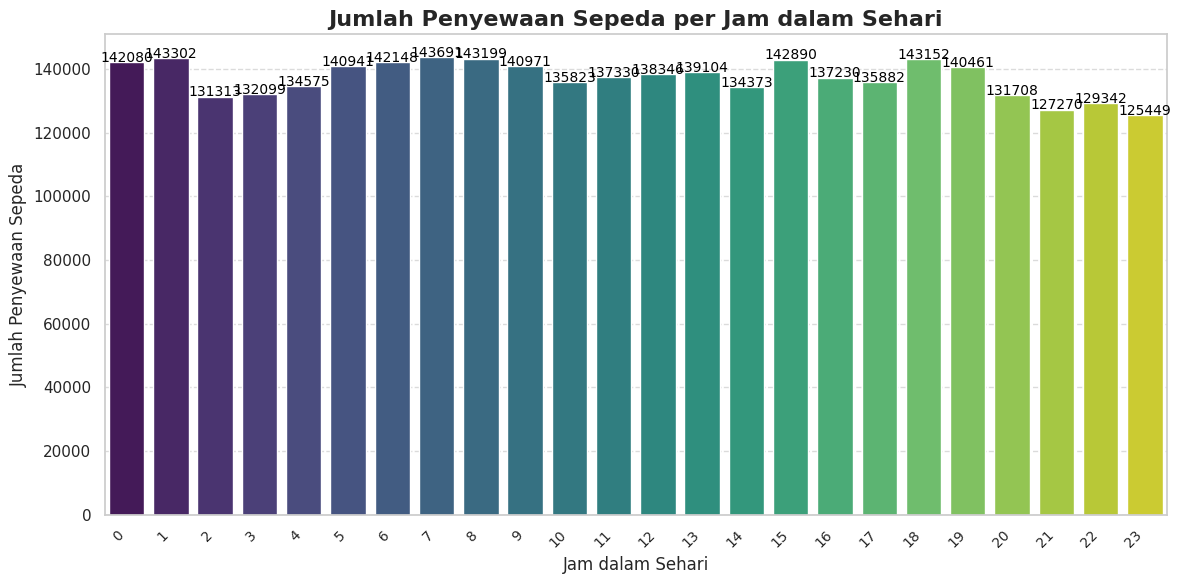

In [233]:
# Mengelompokkan data penyewaan sepeda per jam
hourly_rentals = day_df.groupby('hr')['cnt'].sum().reset_index()

# Menampilkan hasil jumlah penyewaan sepeda per jam
print("Jumlah sepeda yang disewa per jam:")
print(hourly_rentals)

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Membuat bar plot untuk jumlah penyewaan sepeda per jam
sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='viridis')

# Menambahkan label pada setiap bar dengan posisi yang lebih rapi
for index, row in hourly_rentals.iterrows():
    plt.text(row['hr'], row['cnt'] + 100, f'{row["cnt"]}', color='black', ha="center", fontsize=10)

# Menambahkan grid horizontal untuk membantu pembacaan angka
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan judul dan label sumbu dengan pengaturan ukuran font yang lebih besar
plt.title('Jumlah Penyewaan Sepeda per Jam dalam Sehari', fontsize=16, fontweight='bold')
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

# Mengatur label sumbu x agar lebih mudah dibaca (rotation dan penataan jarak)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan layout yang rapih
plt.tight_layout()

# Menampilkan plot
plt.show()

### Pertanyaan 2: Paling banyak sepeda disewa perhari dalam seminggu?

Hari dengan jumlah penyewaan sepeda tertinggi: Sabtu
Jumlah penyewaan pada hari tersebut: 487790


<ipython-input-234-686ee710f9c6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekly_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

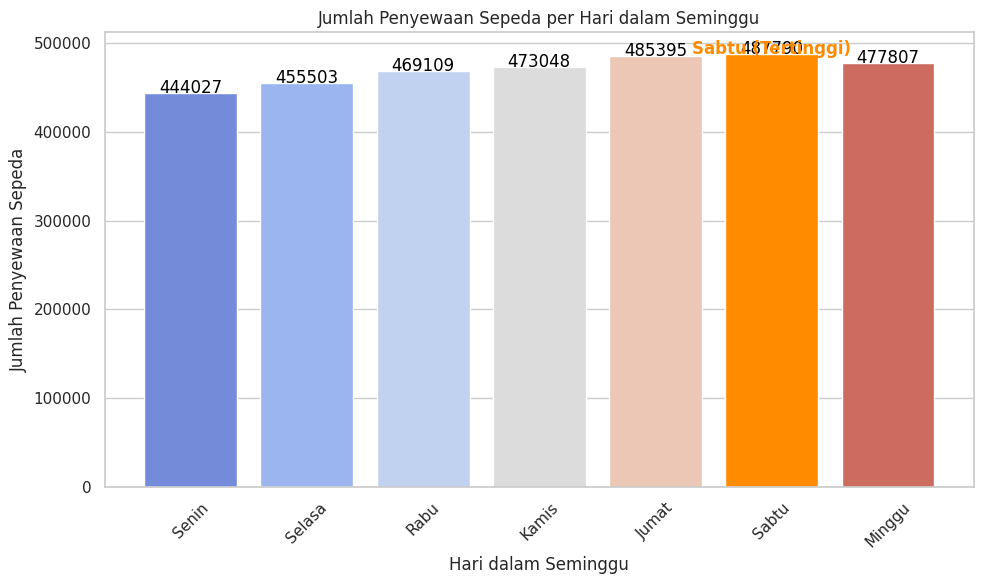

In [234]:
weekly_rentals = day_df.groupby('weekday')['cnt'].sum().reset_index()

# Menemukan hari dengan jumlah penyewaan tertinggi
day_with_highest_rentals = weekly_rentals[weekly_rentals['cnt'] == weekly_rentals['cnt'].max()]
day_names = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Menyimpan nama hari dengan penyewaan tertinggi
day_with_highest_rentals_name = day_names[day_with_highest_rentals['weekday'].values[0]]

# Menampilkan hasil
print("Hari dengan jumlah penyewaan sepeda tertinggi:", day_with_highest_rentals_name)
print("Jumlah penyewaan pada hari tersebut:", day_with_highest_rentals['cnt'].values[0])

# Visualisasi dengan seaborn dan matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekly_rentals, palette='coolwarm')

plt.bar(day_with_highest_rentals['weekday'], day_with_highest_rentals['cnt'], color='darkorange')

for index, row in weekly_rentals.iterrows():
    plt.text(row['weekday'], row['cnt'] + 50, f'{row["cnt"]}', color='black', ha="center")

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.xticks(ticks=range(7), labels=day_names, rotation=45)

plt.text(day_with_highest_rentals['weekday'], day_with_highest_rentals['cnt'] + 200,
         f'{day_with_highest_rentals_name} (Tertinggi)',
         color='darkorange', ha='center', fontsize=12, fontweight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 3: - Apakah ada perbedaan besar dalam penyewaan sepeda antara weekday dan weekend?

Jumlah penyewaan sepeda pada weekday: 2327082
Jumlah penyewaan sepeda pada weekend: 965597
Persentase perbedaan: -58.51%


<ipython-input-235-2e62c1ca7ccd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week_type', y='cnt', data=rental_comparison, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


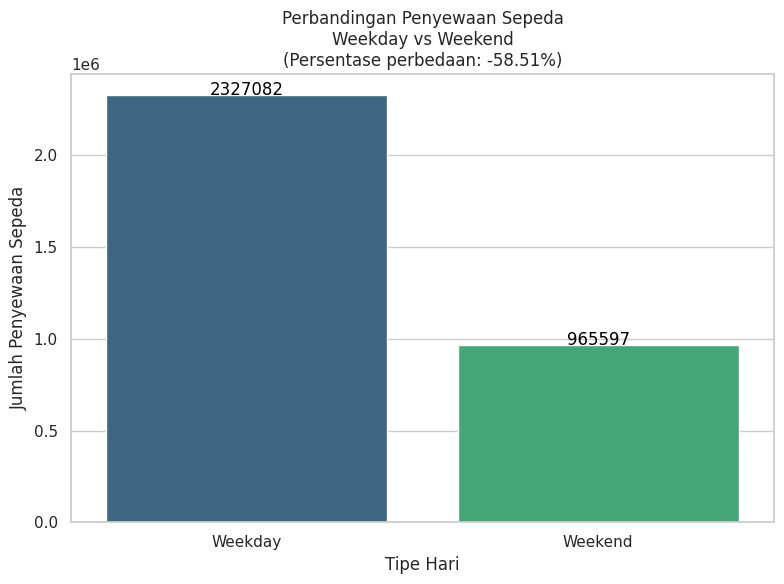

In [235]:
day_df['week_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Menghitung total penyewaan sepeda untuk weekday dan weekend
rental_comparison = day_df.groupby('week_type')['cnt'].sum().reset_index()

# Menghitung persentase perbedaan
weekend_rentals = rental_comparison[rental_comparison['week_type'] == 'Weekend']['cnt'].values[0]
weekday_rentals = rental_comparison[rental_comparison['week_type'] == 'Weekday']['cnt'].values[0]

difference_percentage = ((weekend_rentals - weekday_rentals) / weekday_rentals) * 100

print(f"Jumlah penyewaan sepeda pada weekday: {weekday_rentals}")
print(f"Jumlah penyewaan sepeda pada weekend: {weekend_rentals}")
print(f"Persentase perbedaan: {difference_percentage:.2f}%")

# Visualisasi menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='week_type', y='cnt', data=rental_comparison, palette='viridis')

plt.title(f'Perbandingan Penyewaan Sepeda\nWeekday vs Weekend\n(Persentase perbedaan: {difference_percentage:.2f}%)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Tipe Hari')

for index, row in rental_comparison.iterrows():
    plt.text(row.name, row['cnt'] + 50, f'{row["cnt"]}', color='black', ha="center")

plt.tight_layout()
plt.show()

**Insight:**
- Setelah dilakukan visualisasi menjadi legih mudah melihat dan menjawab pertanyaan
- Mengidentifikasi jumlah penyewaan sepeda dalam sehari
- Mengidentifikasikan sepeda yang disewa perhari dalam seminggu
- Mengidentifikasikan perbedaan sewa antara weekdays dan weekend

## Conclusion


#Conclusion pertanyaan 1
Jumlah sepeda paling banyak diewa yaitu pada jam 7 yang ditandai dengan warna orange. hal ini menunjukkan puncak penyewaan sepeda yang kemungkinan besar terkait dengan kegiatan harian seperti berangkat sekolah maupun bekerja, karena biasanya pagi hari adalah waktu orang paling banyak beraktifitas.

#Conclusion pertanyaan 2
 Berdasarkan analisis jumlah penyewaan sepeda per hari dalam seminggu, hari dengan jumlah penyewaan sepeda tertinggi adalah hari Jumat. Hal ini mungkin menunjukkan bahwa pada hari Jumat dan Sabtu, banyak orang menggunakan sepeda untuk aktivitas akhir pekan, baik untuk perjalanan ke tempat kerja atau rekreasi.

 # Conclusion pertanyaan 3
 Berdasarkan analisis yang membandingkan penyewaan sepeda antara weekday Senin sampai Jumat dan weekend Sabtu sampai Minggu, terdapat perbedaan signifikan yaitu -58.51% dalam jumlah penyewaan sepeda. Secara umum, penyewaan sepeda lebih tinggi pada weekday dibandingkan dengan weekend, yang mungkin menunjukkan bahwa sepeda digunakan lebih banyak untuk perjalanan ke tempat kerja dan aktivitas sehari-hari di hari kerja.

In [237]:
all_df.to_csv("all_data.csv", index=False)